---
# Library importation
---

In [29]:
import pandas as pd
import pickle
import numpy as np
import os
import seaborn as sns
from scipy.io import wavfile

#ML
import sklearn
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict
#from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict

#import catboost

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

#DL
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping

from bibliotheque_ensta import *

print('ok')

ok


---
# Data importation
---

In [2]:
df = pd.read_csv('det_MF_glider_PPDet_20210112.csv')
df.head()

,dataset,filename,start_time,end_time,start_frequency,end_frequency,annotation,annotator
0,Glider SPAms 2019,29_125_040319_152539_68_HYDRO.wav,0,600,NaN,2000,Cachalot,Brest
1,Glider SPAms 2019,29_125_040319_151539_70_HYDRO.wav,0,600,NaN,2000,Cachalot,Brest
2,Glider SPAms 2019,29_126_040319_155539_76_HYDRO.wav,0,600,NaN,2000,Cachalot,Brest
3,Glider SPAms 2019,29_138_040319_223539_95_HYDRO.wav,0,600,NaN,2000,Son impulsionnel Indetermine,Brest
4,Glider SPAms 2019,29_139_040319_230539_86_HYDRO.wav,0,600,NaN,2000,Son impulsionnel Indetermine,Brest


In [3]:
df[df['annotation']=='Orque vocalise']

,dataset,filename,start_time,end_time,start_frequency,end_frequency,annotation,annotator
456,Glider SPAms 2019,29_227_120319_003538_374_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
457,Glider SPAms 2019,29_227_120319_004538_442_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
582,Glider SPAms 2019,29_238_130319_192539_689_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
595,Glider SPAms 2019,29_240_140319_032539_587_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
794,Glider SPAms 2019,30_100_020419_165557_311_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
...,...,...,...,...,...,...,...,...
1556,Glider SPAms 2019,30_112_040419_144557_4_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
1558,Glider SPAms 2019,30_112_040419_165557_592_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
1559,Glider SPAms 2019,30_113_040419_190557_182_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest
1562,Glider SPAms 2019,30_114_050419_002557_671_HYDRO.wav,0,600,NaN,2000,Orque vocalise,Brest


In [4]:
print(len(df))
df.annotation.unique()

1564


array(['Cachalot', 'Son impulsionnel Indetermine',
       'Autre delphinidé vocalise', 'autre delphinidé clic',
       'Autre myscticète', 'Orque vocalise', 'Baleine à bosse'],
      dtype=object)

In [5]:
#spectros : /home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000_HR/

In [8]:
nom_dir = "/home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000/"

os.chdir(nom_dir)
os.getcwd()

'/home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000'

In [9]:
l_png = os.listdir()

for i in range(len(l_png)):
    l_png[i] = l_png[i].replace(".png","")

---
# Data formatting
---

In [10]:
print(len(l_png))

4574


In [11]:
filename = list(df.filename.values)

for i in range(len(filename)):
    filename[i] = filename[i].replace(".wav","")
    
print(len(filename))

1564


In [12]:
print(filename[:3])
print(l_png[:3])

['29_125_040319_152539_68_HYDRO', '29_125_040319_151539_70_HYDRO', '29_126_040319_155539_76_HYDRO']
['29_232_120319_174539_2_HYDRO', '30_83_300319_230557_436_HYDRO', '29_243_140319_134539_226_HYDRO']


In [13]:
res = []
for i in filename :
    res.append(np.isin(i,l_png).tolist())
    
idx = np.where(res)[0]

In [14]:
idx[0]

0

In [15]:
for i in idx :
    del l_png[i]

In [16]:
for i in range(len(l_png)):
    l_png[i] = l_png[i] + ".png"

In [17]:
zero = pd.DataFrame(data={'filename':l_png, "label":[0 for i in range(len(l_png))]})
zero.head()

,filename,label
0,30_83_300319_230557_436_HYDRO.png,0
1,30_115_050419_044557_469_HYDRO.png,0
2,30_64_270319_204557_454_HYDRO.png,0
3,29_67_020319_182539_518_HYDRO.png,0
4,30_33_220319_142557_148_HYDRO.png,0


In [18]:
for i in range(len(filename)):
    filename[i] = filename[i] + ".png"

In [19]:
un = pd.DataFrame(data={'filename':filename,'label':[1 for i in range(len(filename))]})
un.head()

,filename,label
0,29_125_040319_152539_68_HYDRO.png,1
1,29_125_040319_151539_70_HYDRO.png,1
2,29_126_040319_155539_76_HYDRO.png,1
3,29_138_040319_223539_95_HYDRO.png,1
4,29_139_040319_230539_86_HYDRO.png,1


In [20]:
df_final = pd.concat([zero,un],ignore_index=True)
df_final.head()

,filename,label
0,30_83_300319_230557_436_HYDRO.png,0
1,30_115_050419_044557_469_HYDRO.png,0
2,30_64_270319_204557_454_HYDRO.png,0
3,29_67_020319_182539_518_HYDRO.png,0
4,30_33_220319_142557_148_HYDRO.png,0


---
# Visualisation des données
---

Proportion d'évènements dans le dataset : 34%


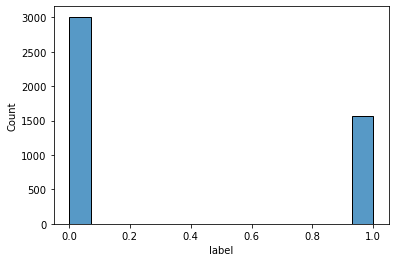

In [22]:
sns.histplot(df_final.label)
print(f"Proportion d'évènements dans le dataset : {int(df_final.label.sum()/len(df_final)*100)}%")


---
# Deep learning preparation
---

In [23]:
df_final.filename = df_final.filename.astype(str)
df_final.label = df_final.label.astype(str)
df_final.head()

,filename,label
0,30_83_300319_230557_436_HYDRO.png,0
1,30_115_050419_044557_469_HYDRO.png,0
2,30_64_270319_204557_454_HYDRO.png,0
3,29_67_020319_182539_518_HYDRO.png,0
4,30_33_220319_142557_148_HYDRO.png,0


In [24]:
# train test split
train_df, test_df = train_test_split(df_final, train_size=0.7, shuffle = True, random_state=1)

<AxesSubplot:xlabel='label', ylabel='Count'>

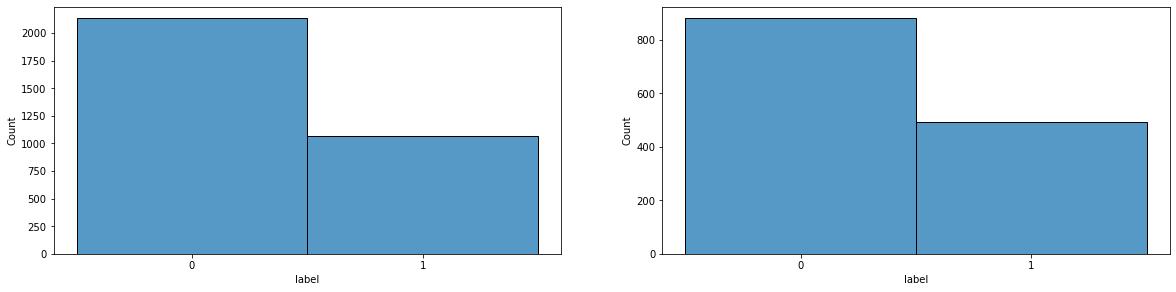

In [25]:
plt.figure(1,figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(train_df.label)
plt.subplot(2,2,2)
sns.histplot(test_df.label)

In [26]:
# Transform Image
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split = 0.2
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [27]:
# loss2 = "categorical_crossentropy"

In [28]:
train_img = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'filename',
    y_col = 'label',
    target_size = (204, 704),
    color_mode = 'rgba',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed =42,
    subset = 'training'
)
val_img = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'filename',
    y_col = 'label',
    target_size = (204, 704),
    color_mode = 'rgba',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'validation'
)

test_img = test_generator.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'filename',
    y_col = 'label',
    target_size = (204, 704),
    color_mode = 'rgba',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

Found 2561 validated image filenames belonging to 2 classes.
Found 640 validated image filenames belonging to 2 classes.
Found 1373 validated image filenames belonging to 2 classes.


In [29]:
from tensorflow.keras.layers import *
from tensorflow.keras import Model

def Network():
    inputs = tf.keras.Input(shape=(204, 704, 4))
    x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same')(x)
    
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
        
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
        
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
        
    x = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
        
    x = Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
        
    x = Flatten()(x)
       
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
        
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
        
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
        
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
        
    output = Dense(2, activation = "softmax")(x)
    
    model = Model(inputs, output)
    
    return model

model = Network()

normal = len(zero)
presence = len(un)
total = len(df_final)


weight_for_0 = (1/normal) * (total) / 2.0 
weight_for_1 = (1/presence) * (total) / 2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

history = model.fit(
    train_img,
    validation_data = val_img,
    epochs = 10,
    class_weight=class_weight,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 5,
        restore_best_weights = True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        patinence = 3
        )
    ])

Weight for class 0: 0.76
Weight for class 1: 1.46
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 204, 704, 4)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 204, 704, 16)      592       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 204, 704, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 204, 704, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 102, 352, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 102, 352, 16)      0         
_________________________________________________________________
conv2d_2 (C

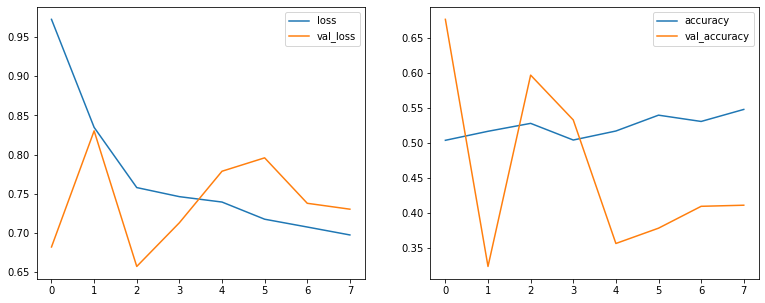

In [30]:
fig = plt.figure(figsize=(20,5))

ax = plt.subplot(131)

epochs = [i for i in range(len(history.history['loss']))]
ax.plot(epochs, history.history['loss'], label='loss')
ax.plot(epochs, history.history['val_loss'], label='val_loss')
plt.legend()

ax = plt.subplot(132)
ax.plot(epochs, history.history['accuracy'], label='accuracy')
ax.plot(epochs, history.history['val_accuracy'], label='val_accuracy')
plt.legend()

plt.show()

In [13]:
nom_dir = "/home4/datahome/rbessoua/Presence/"

os.chdir(nom_dir)
os.getcwd()

'/home4/datahome/rbessoua/Presence'

In [34]:
model.save("1_model")
model.save("1_model.h5")

INFO:tensorflow:Assets written to: 1_model/assets


---
# Model Interpretation
---

In [23]:
import PIL.Image
from keras import backend as K
import tensorflow as tf

In [15]:
model = load_model("1_model.h5")

(204, 704, 4)


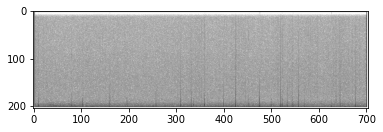

In [16]:
nom_dir = "/home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000/"

os.chdir(nom_dir)
os.getcwd()

name = "29_125_040319_152539_68_HYDRO.png"
im = PIL.Image.open(name).convert('RGBA')
T = np.array(im)/255
test = np.asarray([T])
plt.imshow(T)
print(T.shape)
plt.show()
#test = np.asarray([T])
preds = model.predict(test)

In [17]:
np.argmax(preds)

0

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 204, 704, 4)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 204, 704, 16)      592       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 204, 704, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 204, 704, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 102, 352, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 102, 352, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 102, 352, 32)      4640  

In [30]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [31]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [32]:
nom_dir = "/home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000/"

os.chdir(nom_dir)
os.getcwd()

img_path = "29_125_040319_152539_68_HYDRO.png"
im = PIL.Image.open(name).convert('RGBA')
T = np.array(im)/255

last_conv_layer_name = "conv2d_9"

heatmap = make_gradcam_heatmap(T, model, last_conv_layer_name, pred_index=None)

save_and_display_gradcam(img_path='Presence/', heatmap)

NameError: name 'img_array' is not defined

In [ ]:
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)